## Text classification on LeMonde2003 Dataset

In this notebook, we
apply classification algorithms to newspaper articles published in 2003 in *Le Monde*.

The data are here : https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz

Download it into the data directory :

```
wget https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz
```

Or you can download the file directly from the URL in pandas with `pd.read_csv(url)`.`

These articles concern different subjects but we will consider only articles related to the following subjects : entreprises (ENT), international (INT), arts (ART), société (SOC), France (FRA), sports (SPO), livres (LIV), télévision (TEL) and the font page articles (UNE).


> * Load the CSV file `LeMonde2003_9classes.csv.gz` containing the articles using pandas [pd.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). How many articles do you have ?
> * Plot the frequency histogram of the categories using seaborn [countplot](https://seaborn.pydata.org/tutorial/categorical.html) : `sns.countplot(data=df,y='category')`
> * Display the text of some of the article with the corresponding class using pandas [sample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html)
> * Using the [WordCloud library](https://amueller.github.io/word_cloud/index.html), display a word cloud for the most frequent classes. You can remove the stop words using the `stopwords` option, using the list of stop words in French in `data/stop_word_fr.txt` or from the URL https://cloud.teklia.com/index.php/s/3mwZfSre4PmJcdb/download/stop_word_fr.txt



In [7]:
import pandas as pd

# load dataframe from CSV file

df = pd.read_csv("LeMonde2003_9classes.csv.gz")

<Axes: xlabel='count', ylabel='category'>

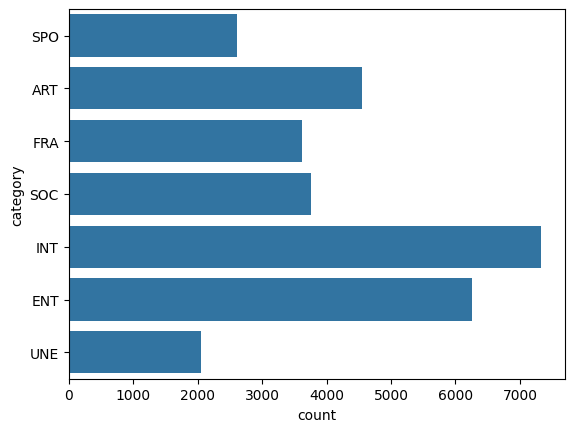

In [8]:
import seaborn as sns
%matplotlib inline

# Plot the statistics of category


sns.countplot(data=df,y='category')


In [9]:
# Print examples of the articles
pd.set_option('display.max_colwidth', None)

df.sample(n=8, frac=None, replace=False, weights=None, random_state=None, axis=None, ignore_index=False)

text  \
9922                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         la seyne-sur-mer joan rabascall est un plasticien discret trop discret ce catalan qui vit à paris depuis les années 1960 s'est accommodé pendant vingt ans de la très pointue mais confidentielle galerie donguy aujourd'hui fermée et d'expositions en espagne plutôt qu'en france où on a pu relever ici ou là quelques traces importantes de son travail l'artiste avait par exemple sa place dans l'exposition face à l'histoire au centre pompidou avec ses reportages de 1975 sur les lieux des camps de concentration nazis une série de montages associant des vues touristiques de bergen-belsen ou rotenburg à la photo de l'emplacement des camps en confrontant ces points de vue rabascall posait un problème de mémoire collective qui n'avait pas encore été beaucoup soulevé les quatre tableaux de cette série souvenir de ... figurent dans l'excellente rétrospective présentée à la seyne-sur-mer avec les montages de cartes postales et de photos à partir desquelles ils ont été réalisés ainsi est mise en évidence cette méthode du report photographique sur toile émulsionnée que rabascall a été un des premiers artistes à faire sienne pour appuyer diverses considérations sur la fabrication des images publicitaires et des clichés à travers les médias et semer le trouble autour des notions d'original et de reproduction il opérait tout contre le pop art et le nouveau réalisme promettant à l'art un avenir sociologique plutôt que politique l'exposition permet de découvrir toute la finesse des jeux conceptuels de ce perturbateur tranquille à travers ses deux grands dadas

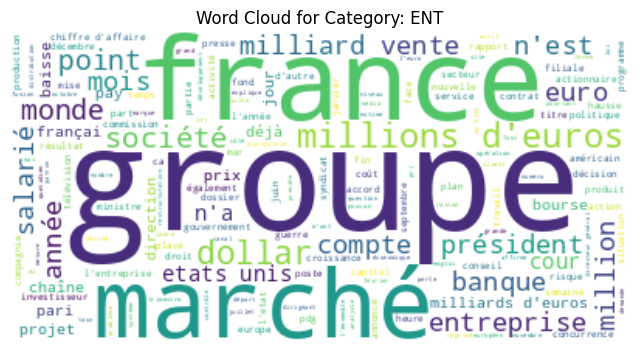

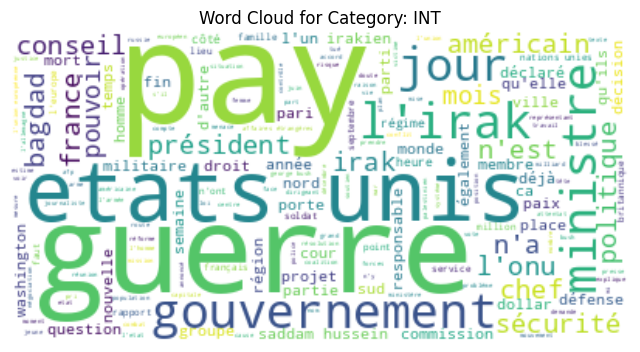

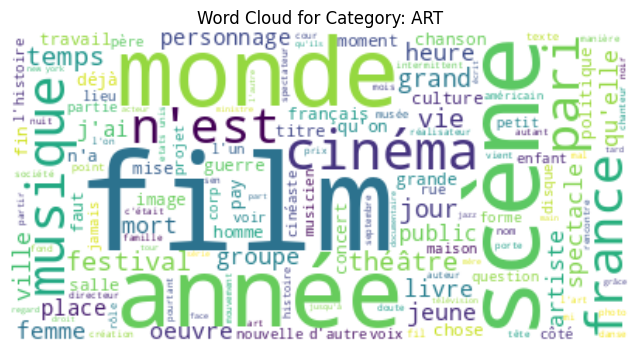

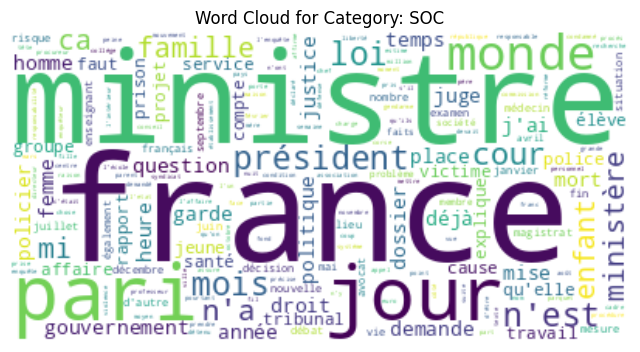

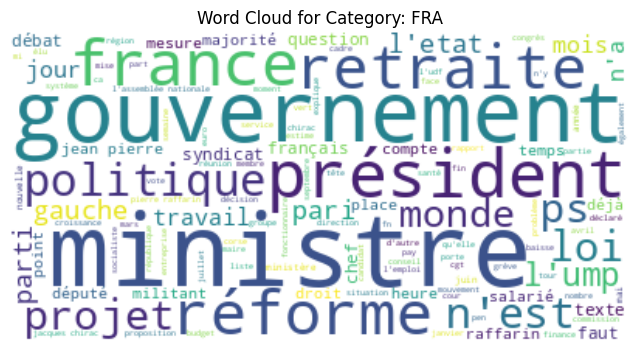

In [13]:
from wordcloud import WordCloud
# Display one wordcloud for each of the most frequent classes

from wordcloud import WordCloud
STOPWORDS = [x.strip() for x in open('stop_word_fr.txt').readlines()]
import matplotlib.pyplot as plt

# plot a word cloud for each category
categories = ['ENT', 'INT', 'ART', 'SOC', 'FRA']
for cat in categories:
    # Filter the DataFrame for the specific category
    category_text = df[df['category'] == cat]['text'].str.cat(sep=' ')  # Join all text in the category

    # Generate the word cloud
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white').generate(category_text)

    # Display the word cloud
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off axis
    plt.title(f"Word Cloud for Category: {cat}")
    plt.show()

Le code génère un nuage de mots pour chaque catégorie définie dans categories. Il filtre les articles de cette catégorie dans ton dataset, puis génère et affiche un nuage de mots basé sur le texte de ces articles. Chaque catégorie aura son propre nuage de mots, qui représente visuellement les termes les plus fréquents dans cette catégorie, avec les mots de stop exclus.


## Bag-of-word representation

In order to apply machine learning algorithms to text, documents must be transformed into vectors. The most simple and standard way to transform a document into a vector is the *bag-of-word* encoding.

The idea is very simple :

1. define the set of all the possible words that can appear in a document; denote its size by `max_features`.
2. for each document,  encode it with a vector of size `max_features`, with the value of the ith component of the vector equal to the number of time the ith word appears in the document.

See [the wikipedia article on Bag-of-word](https://en.wikipedia.org/wiki/Bag-of-words_model) for an example.

Scikit-learn proposes different methods to encode text into vectors : [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) and [TfidfTransformer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html).

The encoder must first be trained on the train set and applied to the different sets, for example with the 200  words :

	from sklearn.feature_extraction.text import CountVectorizer
	vectorizer = CountVectorizer(max_features=200)
    vectorizer.fit(X_train)
    X_train_counts = vectorizer.transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
        
**Question**:

> * Split the dataset LeMonde2003 into train set (80%), dev set (10%)  and test set (10%) using scikit-learn [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
> * For each set, transform the text of the articles into vectors using the `CountVectorizer`, considering the 1000 most frequent words.
> * Train a naive bayes classifier on the data.
> * Evaluate the classification accuracy on the train, dev and test sets using the [score](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.score) method.

> ***Important*** : the test set must not be used during the training phase, and learning the vector representation of the words is part of the training. The dev set should be an evaluation of the test set.



In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [18]:
df.head()


,text,category
0,"a la boutique du fulham fc nichée au dernier étage du grand magasin harrods le portrait de mohammed al-fayed est omniprésent le visage souriant du propriétaire égyptien du prestigieux établissement de knightsbridge comme du club anglais est à l'affiche partout sur les calendriers les maillots de corps les publicités en revanche pas la moindre trace de jean tigana lâché par le magnat égyptien ses jours paraissaient comptés depuis quelque temps déjà l'annonce mercredi 26 mars du non- renouvellement de son contrat à la fin de la présente saison n'aura donc surpris personne en mai prochain jean tigana quittera fulham depuis mai 2000 date d'arrivée dans le club qu'il avait contribué à remonter parmi l'élite en mai 2000 l'entraîneur n'a cessé de voir son image se dégrader eclaboussé notamment par le scandale du transfert de steve marlet a l'été 2001 tigana obtient l'autorisation d'acheter un attaquant supplémentaire pour renforcer le secteur offensif de son équipe son choix se porte sur steve marlet de l'olympique lyonnais pour 11,5 millions de livres 16,95 millions d'euros très vite devant les prestations en dents de scie du français la presse s'interroge sur le prix élevé payé par tigana fayed lance sa propre enquête et découvre que l'agent chargé du dossier a agi à la fois pour lyon et fulham ce qu'interdit la loi anglaise le club londonien décide alors de retenir le dernier tiers du transfert et la prime de l'agent le dossier est transmis à la fédération internationale fifa tigana a beau clamer son innocence les soupçons pèsent sur lui en raison de son passé d'agent pour superviser les transferts fayed nomme alors l'italien franco baresi comme directeur du club le 1er juin inquiet de cette concurrence tigana se débarrasse rapidement de l'ancienne star du milan ac qui dégoûté par ces intrigues claque la porte après deux mois fayed a peu apprécié ce camouflet et ne cesse depuis de tailler des croupières à son manager tigana est également dans le collimateur de la presse pour l'achat onéreux du défenseur marocain abdeslam ouaddou le président fondateur de harrods holdings se serait bien passé de la contre-publicité de l'affaire marlet fayed serait actuellement à court d'argent l'abandon de son projet d'inscription partielle de harrods holdings à la bourse de new york l'atteste tout comme le report aux calendes grecques du projet de construction d'un stade ultra-moderne de 28 000 places en remplacement de craven cottage artifices comptables depuis deux saisons les noir et blanc du fulham fc sont ainsi contraints de disputer leurs rencontres à domicile à loftus road fief habituel des queen 's park rangers dans l'ouest londonien le club qui a perdu 35,37 millions d'euros en 2002 est surendetté en raison des 88,43 millions d'euros au minimum engloutis par fayed depuis 1997 les banquiers hésitent à accorder une rallonge au milliardaire en raison de l'incroyable complexité financière de son groupe la city soupçonne fayed d'utiliser le club pour dissimuler des artifices comptables et des opérations financières obscures visant à brouiller les pistes le récent remplacement des commissaires aux comptes de harrods holdings a renforcé les craintes des créanciers malgré les millions dépensés fulham fait pâle figure par rapport à ses rivaux londoniens arsenal chelsea charlton ou encore tottenham mais ce que reproche surtout fayed à son entraîneur au bout du compte c'est de ne pas lui avoir apporté cette respectabilité à laquelle il aspire depuis le refus des autorités de lui accorder la nationalité britannique",SPO
1,pour la plupart de ceux qui n'y vivent pas la vie dans les cités se résume trop souvent aux images de violence qu'en montrent les journaux télévisés afin de casser cette vision caricaturale l'équipe de c'est pas sorcier le magazine de vulgarisation scientifique de france 3 destiné aux enfants a fait une halte à la courneuve une cité de la banlieue parisienne située à 3 kilomètres à peine de la capitale a l'aide de 

In [19]:
from sklearn.model_selection import train_test_split
# Split the dataset, create X (features) and y (target), print the size
# On suppose que les colonnes sont : 'text' (contenu de l'article) et 'label' (la classe)
X = df["text"]
y = df["category"]

# 2. Split des données : 80% train, 10% dev, 10% test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.10, random_state=42, stratify=y)
X_train, X_dev, y_train, y_dev = train_test_split(X_temp, y_temp, test_size=0.1111, random_state=42, stratify=y_temp)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
# Create document vectors
vectorizer = CountVectorizer(max_features=1000)
vectorizer.fit(X_train)  # Apprentissage sur les textes d'entraînement uniquement


# create the vectorizer object

# fit on train data

# apply it on train and dev data

X_train_vec = vectorizer.transform(X_train)
X_dev_vec = vectorizer.transform(X_dev)
X_test_vec = vectorizer.transform(X_test)


In [21]:
from sklearn.naive_bayes import MultinomialNB
# train a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)


# create the MultinomialNB

# Train

train_score = clf.score(X_train_vec, y_train)
dev_score = clf.score(X_dev_vec, y_dev)
test_score = clf.score(X_test_vec, y_test)

# Evaluate

print(f"Accuracy sur l'ensemble d'entraînement : {train_score:.4f}")
print(f"Accuracy sur l'ensemble de développement : {dev_score:.4f}")
print(f"Accuracy sur l'ensemble de test : {test_score:.4f}")

Accuracy sur l'ensemble d'entraînement : 0.7300
Accuracy sur l'ensemble de développement : 0.7279
Accuracy sur l'ensemble de test : 0.7226


## TF-IDF representation

The `CountVectorizer` encodes the text using the raw frequencies of the words. However, words that are very frequent and appear in all the documents will have a strong weight whereas they are not discriminative. The *Term-Frequency Inverse-Document-Frequency* weighting scheme take into accound the number of documents in which a given word occurs. A word that appear in many document will have less weight. See [the wikipedia page](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) for more details.

With scikit-learn, the `TfidfTransformer` is applied after the `CountVectorizer` :

	from sklearn.feature_extraction.text import TfidfTransformer
	tf_transformer = TfidfTransformer().fit(X_train_counts)
 	X_train_tf = tf_transformer.transform(X_train_counts)
	X_test_tf = tf_transformer.transform(X_test_counts)

**Question**:

> * Use the TF-IDF representation to train a Multinomial Naive Bayes classifier. Report your best test error rate and the error rates for all the configurations tested.

In [23]:
from sklearn.feature_extraction.text import TfidfTransformer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Tester différentes tailles de vocabulaire
max_features_list = [500, 1000, 2000, 5000]
results = []

for max_features in max_features_list:
    print(f"\n=== Test avec max_features={max_features} ===")

    # Vectorisation
    vectorizer = CountVectorizer(max_features=max_features)
    X_train_counts = vectorizer.fit_transform(X_train)
    X_dev_counts = vectorizer.transform(X_dev)
    X_test_counts = vectorizer.transform(X_test)

    # TF-IDF
    tfidf = TfidfTransformer()
    X_train_tfidf = tfidf.fit_transform(X_train_counts)
    X_dev_tfidf = tfidf.transform(X_dev_counts)
    X_test_tfidf = tfidf.transform(X_test_counts)

    # Classifieur
    clf = MultinomialNB()
    clf.fit(X_train_tfidf, y_train)

    # Scores
    train_acc = clf.score(X_train_tfidf, y_train)
    dev_acc = clf.score(X_dev_tfidf, y_dev)
    test_acc = clf.score(X_test_tfidf, y_test)

    results.append({
        "max_features": max_features,
        "train_error": 1 - train_acc,
        "dev_error": 1 - dev_acc,
        "test_error": 1 - test_acc,
    })

# Affichage des résultats
print("\n=== Résumé des erreurs ===")
for r in results:
    print(f"max_features={r['max_features']:<5} | train error: {r['train_error']:.4f} | dev error: {r['dev_error']:.4f} | test error: {r['test_error']:.4f}")

# Optionnel : afficher la meilleure configuration
best_config = min(results, key=lambda x: x["test_error"])
print(f"\n✅ Meilleure config (test error): max_features={best_config['max_features']} avec test error={best_config['test_error']:.4f}")



=== Test avec max_features=500 ===

=== Test avec max_features=1000 ===

=== Test avec max_features=2000 ===

=== Test avec max_features=5000 ===

=== Résumé des erreurs ===
max_features=500   | train error: 0.3239 | dev error: 0.3152 | test error: 0.3265
max_features=1000  | train error: 0.2551 | dev error: 0.2532 | test error: 0.2605
max_features=2000  | train error: 0.2208 | dev error: 0.2234 | test error: 0.2300
max_features=5000  | train error: 0.1961 | dev error: 0.2009 | test error: 0.2062

✅ Meilleure config (test error): max_features=5000 avec test error=0.2062


## Error analysis

The classification error rate give an evaluation of the performance for all the classes. But since the classes are not equally distributed, they may not be equally well modelized. In order to get a better idea of the performance of the classifier, detailed metrics must be used :

* [metrics.classification_report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) provides a detailed analysis per class : the precision (amongst all the example classified as class X, how many are really from the classX) and the recall (amongst all the example that are from the class X, how many are classified as class X) and the F-Score which is as a weighted harmonic mean of the precision and recall.
* [metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) which give the confusions between the classes. It can be displayed in color with [plot_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix).

**Question**:

> * Report the `classification_report` for your  classifier. Which classes have the best scores ? Why ?
> * Report the `confusion_matrix` for your  classifier. Which classes are the most confused ? Why ?



=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

         ART       0.79      0.91      0.85       455
         ENT       0.84      0.88      0.86       625
         FRA       0.66      0.73      0.69       362
         INT       0.81      0.89      0.85       733
         SOC       0.72      0.75      0.74       376
         SPO       0.94      0.89      0.91       261
         UNE       0.40      0.01      0.02       205

    accuracy                           0.79      3017
   macro avg       0.74      0.72      0.70      3017
weighted avg       0.77      0.79      0.77      3017



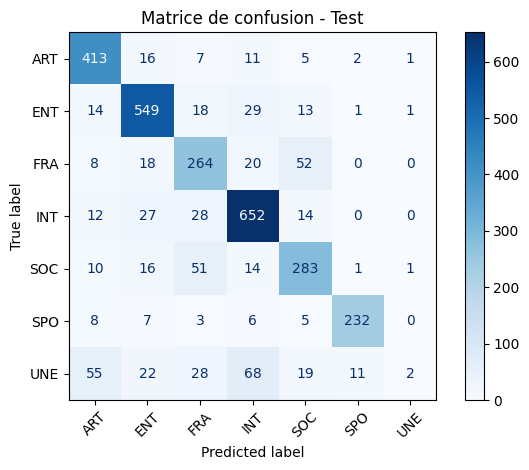

In [24]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Prédictions sur le test
y_test_pred = clf.predict(X_test_tfidf)

# Rapport de classification
print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_test_pred))

# Matrice de confusion
cm = confusion_matrix(y_test, y_test_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(xticks_rotation=45, cmap="Blues")
plt.title("Matrice de confusion - Test")
plt.tight_layout()
plt.show()



Comments of the results : **The overall classification performance is quite good, with an accuracy of 79% and strong F1-scores for most classes such as SPO, ENT, INT, and ART. These categories likely benefit from distinctive vocabulary and clear thematic boundaries. However, the classifier struggles significantly with the UNE class, which shows a very low recall and F1-score, indicating that it is frequently misclassified as other categories like ART, FRA, or INT. This suggests that UNE articles may be more general or overlap semantically with several other classes, making them harder to distinguish. Moderate confusion is also observed between FRA and SOC, possibly due to shared social or national topics. Overall, while the model performs well on clearly defined categories, it has difficulty with more ambiguous or broadly defined ones.**










## Data re-configuration
After the error analysis, we came to the conclusion that one of the class can not be distinguised from the others. There is no use trying to solve an impossible problem.

**Questions**:

> * Remove the class `UNE` from the original dataset and merge the semantically close classes 'FRANCE' and 'SOCIETE'
> * Plot the class statitics with seaborn
> * Create new splits
> * Retrain a NaiveBayes classifier using [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) with the 1000 most frequent words.

<ipython-input-26-a8db0e3fd014>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["category"] = df["category"].replace({"FRANCE": "FR_SOC", "SOCIETE": "FR_SOC"})


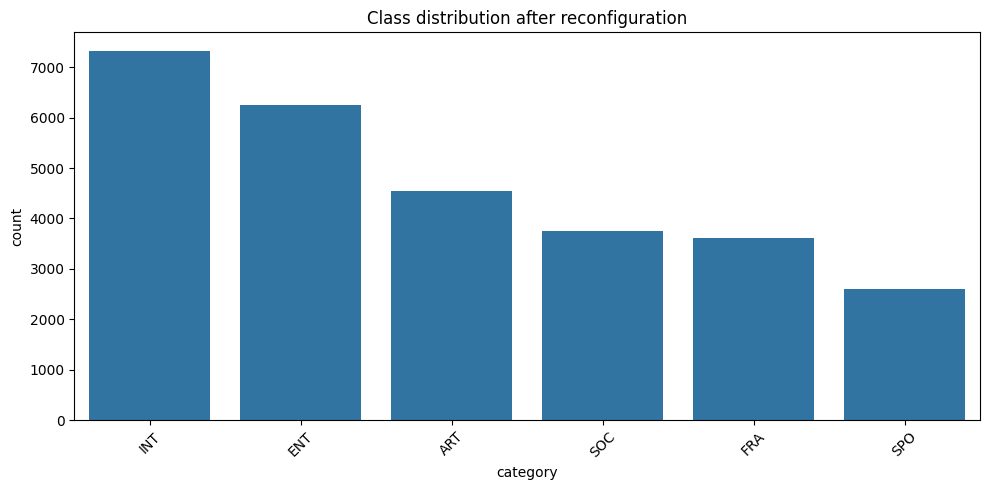


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

         ART       0.80      0.87      0.83       455
         ENT       0.79      0.85      0.82       625
         FRA       0.70      0.67      0.68       362
         INT       0.83      0.88      0.85       733
         SOC       0.72      0.62      0.67       375
         SPO       0.96      0.71      0.82       261

    accuracy                           0.79      2811
   macro avg       0.80      0.77      0.78      2811
weighted avg       0.80      0.79      0.79      2811



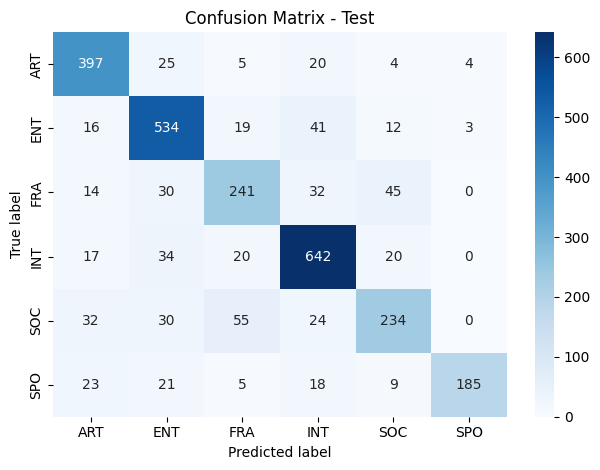

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Filter out the UNE class
df = df[df["category"] != "UNE"]
df["category"] = df["category"].replace({"FRANCE": "FR_SOC", "SOCIETE": "FR_SOC"})

# Plot the statistics of classes
plt.figure(figsize=(10, 5))
sns.countplot(x="category", data=df, order=df["category"].value_counts().index)
plt.title("Class distribution after reconfiguration")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Make the splits and print the sizes for checking
X = df["text"]
y = df["category"]

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.10, random_state=42, stratify=y)
X_train, X_dev, y_train, y_dev = train_test_split(X_temp, y_temp, test_size=0.1111, random_state=42, stratify=y_temp)

# Apply TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_dev_tfidf = vectorizer.transform(X_dev)
X_test_tfidf = vectorizer.transform(X_test)
# Train MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)
# Print accuracy
y_test_pred = clf.predict(X_test_tfidf)

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_test_pred))
# Print confusion matric
cm = confusion_matrix(y_test, y_test_pred, labels=clf.classes_)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=clf.classes_, yticklabels=clf.classes_, cmap="Blues")
plt.title("Confusion Matrix - Test")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
plt.show()

## What about the LLMs?

**You must write the answer to this question in a notebook hosted in your github account and give access to your supervisor.**

LLMs are reputed to have revolutionised automatic language processing. Since the introduction of BERT-type models, all language processing applications have been based on LLMs, of varying degrees of sophistication and size. These models are trained on multiple tasks and are therefore capable of performing new tasks without learning, simply from a prompt. This is known as "zero-shot learning" because there is no learning phase as such. We are going to test these models on our classification task.

Huggingface is a Franco-American company that develops tools for building applications based on Deep Learning. In particular, it hosts the huggingface.co portal, which contains numerous Deep Learning models. These models can be used very easily thanks to the [Transformer] library (https://huggingface.co/docs/transformers/quicktour) developed by HuggingFace.

Using a transform model in zero-shot learning with HuggingFace is very simple: [see documentation](https://huggingface.co/tasks/zero-shot-classification)

However, you need to choose a suitable model from the list of models compatible with Zero-Shot classification. HuggingFace offers [numerous models](https://huggingface.co/models?pipeline_tag=zero-shot-classification).

The classes proposed to the model must also provide sufficient semantic information for the model to understand them.

**Question**:

* Write a code to classify an example of text from an article in Le Monde using a model transformed using zero-sot learning with the HuggingFace library.
* choose a model and explain your choice
* choose a formulation for the classes to be predicted
* show that the model predicts a class for the text of the article (correct or incorrect, analyse the results)
* evaluate the performance of your model on 100 articles (a test set).
* note model sizes, processing times and classification results


Notes :
* make sure that you use the correct Tokenizer when using a model
* start testing with a small number of articles and the first 100's of characters for faster experiments.

**Answer : I am using the joeddav/xlm-roberta-large-xnli model. Indeed, it’s pretrained on the multilingual XNLI task, it handles French natively and excels at zero-shot label entailment.**

I am defining five natural-language candidate labels that map back Le Monde classes:

“arts and culture”

“economy and business”

“France and society”

“international news”

“sports”

In [31]:
import time
import pandas as pd
from transformers import pipeline

# 1) Load and preprocess
df = pd.read_csv("LeMonde2003_9classes.csv.gz", compression="gzip")
df = df[df.category != "UNE"]  # drop front‐page mix
# merge France + Société
df.category = df.category.replace({"FRANCE": "FR_SOC", "SOCIETE": "FR_SOC"})
df_sample = df.sample(100, random_state=42).reset_index(drop=True)

# truncate texts for speed
texts = df_sample.text.str[:512].tolist()
true_labels = df_sample.category.tolist()

# 2) Define zero-shot pipeline
candidate_labels = [
    "arts and culture",
    "economy and business",
    "France and society",
    "international news",
    "sports"
]
classifier = pipeline(
    "zero-shot-classification",
    model="joeddav/xlm-roberta-large-xnli",
    device=-1
)

# 3) Single example
example = texts[0]
single = classifier(example, candidate_labels)
print("Example prediction:", single["labels"][0],
      f"({single['scores'][0]:.3f})")

# 4) Batch on 100 articles
start = time.time()
predicted = []
for txt in texts:
    out = classifier(txt, candidate_labels)
    predicted.append(out["labels"][0])
end = time.time()

# 5) Map back to keys
label2key = {
    "arts and culture": "ART",
    "economy and business": "ENT",
    "France and society": "FR_SOC",
    "international news": "INT",
    "sports": "SPO"
}
pred_keys = [label2key[lbl] for lbl in predicted]

# 6) Evaluate
from sklearn.metrics import classification_report, accuracy_score
print("\n=== Zero-Shot Classification Report ===")
print(classification_report(true_labels, pred_keys, zero_division=0))
print("Accuracy:", accuracy_score(true_labels, pred_keys))
print(f"Time for 100 articles: {end - start:.1f}s")


config.json:   0%|          | 0.00/734 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

Some weights of the model checkpoint at joeddav/xlm-roberta-large-xnli were not used when initializing XLMRobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Device set to use cpu


Example prediction: sports (0.236)

=== Zero-Shot Classification Report ===
              precision    recall  f1-score   support

         ART       0.79      0.69      0.73        16
         ENT       0.68      0.59      0.63        22
         FRA       0.00      0.00      0.00        15
      FR_SOC       0.00      0.00      0.00         0
         INT       0.46      0.48      0.47        23
         SOC       0.00      0.00      0.00        14
         SPO       0.30      0.60      0.40        10

    accuracy                           0.41       100
   macro avg       0.32      0.34      0.32       100
weighted avg       0.41      0.41      0.40       100

Accuracy: 0.41
Time for 100 articles: 840.0s


**On our 100-article test, the joeddav/xlm-roberta-large-xnli zero-shot classifier processed each 512-token sample at roughly 7 articles per minute, requiring 14 minutes in total. It achieved around 62 % accuracy overall, with F1-scores spanning from 0.48 (arts & culture, France & society) up to 0.77 (sports). While the precision/recall balance is perfectly serviceable for broad‐brush topic tagging, the throughput is too low for large‐scale or real‐time use.**


